# Profile

* Nama Lengkap: Niken Amelia
* No. HP: 0853 1132 1124
* Pekerjaan: Mahasiswa
* Email: niken.amelia123@gmail.com
* LinkedIn: https://www.linkedin.com/in/nikenamelia/
* Github: https://github.com/nikenaml

Kriteria Submission

1.   Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
2.   Dataset harus dibagi menjadi train set dan validation set.
3.   Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
4.   Harus mengimplementasikan augmentasi gambar.
5.   Menggunakan image data generator.
6.   Model harus menggunakan model sequential.
7.   Pelatihan model tidak melebihi waktu 30 menit.
8.   Program dikerjakan pada Google Colaboratory.
9.   Akurasi dari model minimal 85%.
10.  Dapat memprediksi gambar yang diunggah ke Colab

# Load Dataset

In [237]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [238]:
# Download dataset serta membuat sebuah temporary dengan nama file zip
!wget --no-check-certificate \
   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
   -O /tmp/rps.zip

--2021-06-21 09:02:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip         87%[================>   ] 270.78M  2.41MB/s    in 4m 17s  

2021-06-21 09:06:34 (1.05 MB/s) - Read error at byte 283934720/322873683 (Connection reset by peer). Retrying.

--2021-06-21 09:06:35--  (try: 2)  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [applic

In [239]:
# melakukan ekstraksi pada file zip
import zipfile

tmp_zip = '/tmp/rps.zip'

rps_zip = zipfile.ZipFile(tmp_zip, 'r')
rps_zip.extractall('/content/drive/My Drive')
rps_zip.close()

In [240]:
import os

In [261]:
os.listdir('/content/drive/My Drive/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

-Pembagian Data- <br>
Menentukan direktori penyimpanan seluruh dataset 

In [262]:
!pip install split-folders

In [263]:
import splitfolders
root_dir = '/content/drive/My Drive/rockpaperscissors/rps-cv-images'
splitfolders.ratio(root_dir, output = "/content/drive/My Drive/rockpaperscissors", ratio = (.6, .4))

# Membuat direktori awal untuk data training dan data validasi
train_dir = os.path.join("/content/drive/My Drive/rockpaperscissors", "train")
validation_dir = os.path.join("/content/drive/My Drive/rockpaperscissors", "val")

Copying files: 2188 files [00:01, 1979.35 files/s]


In [264]:
os.listdir(root_dir)

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

Menentukan direktori penyimpanan masing-masing label

In [265]:
batu_dir = os.path.join(root_dir, 'rock')
kertas_dir = os.path.join(root_dir, 'paper')
gunting_dir = os.path.join(root_dir, 'scissors')

In [266]:
batu_dir

'/content/drive/My Drive/rockpaperscissors/rps-cv-images/rock'

Pengecekan file untuk memastikan file sudah terunduh dengan baik

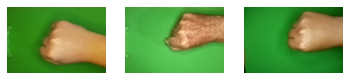

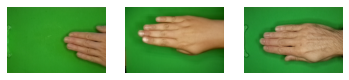

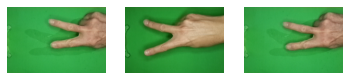

In [267]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for f in [batu_dir, kertas_dir, gunting_dir]:
    for i in range(3):
        sp = plt.subplot(1, 3, i + 1)
        sp.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

Pemecahan pembagian data dan Inisialisasi path data train dan validation
<br> Pada tahap ini, Dataset juga dibagi menjadi 60% Data Train dan 40% Data Validation

In [268]:
from sklearn.model_selection import train_test_split

# Membuat direktori paper menjadi data train dan data validation
kertas_train, kertas_val = train_test_split(os.listdir(kertas_dir), test_size = 0.4, train_size = 0.6)

# Membuat direktori rock menjadi data train dan data validation
batu_train, batu_val = train_test_split(os.listdir(batu_dir), test_size = 0.4, train_size = 0.6)

# Membuat direktori scissors menjadi data train dan data validation
gunting_train, gunting_val = train_test_split(os.listdir(gunting_dir), test_size = 0.4, train_size = 0.6)

In [269]:
# Membuat direktori rock, paper, scissors pada direktori data training
train_kertas = os.path.join(train_dir, 'kertas')
train_batu = os.path.join(train_dir, 'batu')
train_gunting = os.path.join(train_dir, 'gunting')

# Membuat direktori rock, paper, scissors pada direktori data validasi
validation_kertas = os.path.join(validation_dir, 'kertas')
validation_batu = os.path.join(validation_dir, 'batu')
validation_gunting = os.path.join(validation_dir, 'gunting')

# Preprocessing

- Membuat image data generator (preprocessing, pelabelan objek gambar & augmentasi gambar) untuk menyiapkan data training dan validation
- Langkah ini untuk proses augmentasi gambar agar menciptakan data-data baru dari data yang telah ada

Augmentasi gambar dengan mengubah skala menjadi 1/255 dan menerapkan horizontal serta vertical flip. 

In [270]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [271]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 20,  
                                   shear_range=0.2, 
                                   horizontal_flip= True, 
                                   fill_mode='nearest')

In [272]:
test_datagen = ImageDataGenerator(rescale = 1/255, 
                                   rotation_range = 20, 
                                   shear_range=0.2, 
                                   horizontal_flip= True, 
                                   fill_mode='nearest')

Mempersiapkan data train dan data validation yang akan dipelajari oleh model

In [273]:
# Memasukkan image data generator ke dalam variabel train_dir & validation_dir
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 300),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 300),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [274]:
cek_generator = train_datagen.flow_from_directory(
        root_dir,
        target_size=(200, 300),
        batch_size=128,
        class_mode='categorical',
        subset='training')

Found 2188 images belonging to 3 classes.


Pengecekan untuk mengetahui nilai variabel y untuk setiap label rock, paper, dan scissors

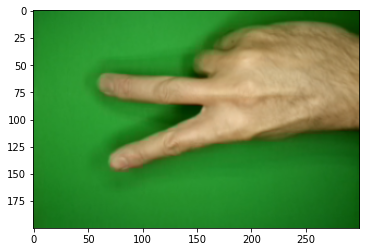

[0. 0. 1.]


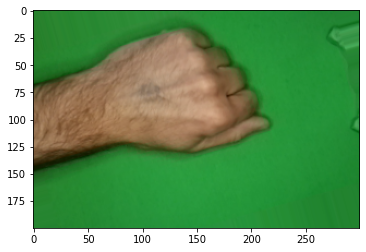

[0. 1. 0.]


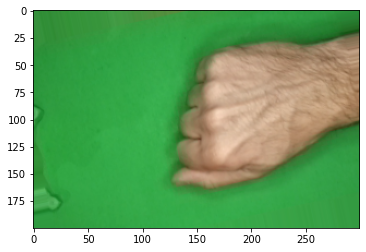

[0. 1. 0.]


In [275]:
x, y = cek_generator.next()
plt.imshow(x[0])
plt.show()
print(y[0])

plt.imshow(x[1])
plt.show()
print(y[1])

plt.imshow(x[2])
plt.show()
print(y[2])

# Modelling

Pembuatan dan pelatihan model neural network

In [276]:
# Membuat arsitektur model CNN 2 Dimensi
import tensorflow as tf

# Membuat jaringan syarat tiruan untuk model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), # Membuat hidden layer
    tf.keras.layers.Dense(3, activation='softmax') # Menambah layer output                       
])

## Penggunaan optimizer RMSprop dan loss categorical_crossentropy

In [281]:
# adam = tf.keras.optimizers.Adam(learning_rate=0.0015)
# model.compile(loss='categorical_crossentropy'
#               ,optimizer=adam
#               ,metrics=['accuracy'])

# optimizer RMSprop dan loss categorical_crossentropy
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy'
              ,optimizer=rmsprop
              ,metrics=['accuracy'])

In [282]:
import time
time_array = []

start_time = time.time()
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=4,
      verbose=1)

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

Epoch 1/10
25/25 [==============================] - 69s 3s/step - loss: 0.2514 - accuracy: 0.9613 - val_loss: 0.0971 - val_accuracy: 0.9453
Epoch 2/10
25/25 [==============================] - 66s 3s/step - loss: 0.0876 - accuracy: 0.9725 - val_loss: 0.1119 - val_accuracy: 0.9609
Epoch 3/10
25/25 [==============================] - 67s 3s/step - loss: 0.0520 - accuracy: 0.9825 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 67s 3s/step - loss: 0.0820 - accuracy: 0.9725 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 67s 3s/step - loss: 0.1061 - accuracy: 0.9688 - val_loss: 0.1902 - val_accuracy: 0.9531
Epoch 6/10
25/25 [==============================] - 66s 3s/step - loss: 0.0320 - accuracy: 0.9875 - val_loss: 0.0351 - val_accuracy: 0.9844
Epoch 7/10
25/25 [==============================] - 67s 3s/step - loss: 0.1696 - accuracy: 0.9550 - val_loss: 0.1148 - val_accuracy: 0.9688
Epoch 8/10
25/25 [==

Visualisasi accuracy dan loss pada tiap epoch
- Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi


In [283]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    # Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi
    plt.figure(figsize=(15, 5))

    # Membuat visualisasi untuk nilai akurasi dan validation akurasi
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy Visualization')
    plt.xlabel("Jumlah Epochs")
    plt.legend()

    # Membuat visualisasi untuk nilai loss dan validation loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss Visualization')
    plt.legend()

Training Accuracy: 0.98
Training Loss: 0.09
Validation Accuracy: 0.99
Validation Loss: 0.04




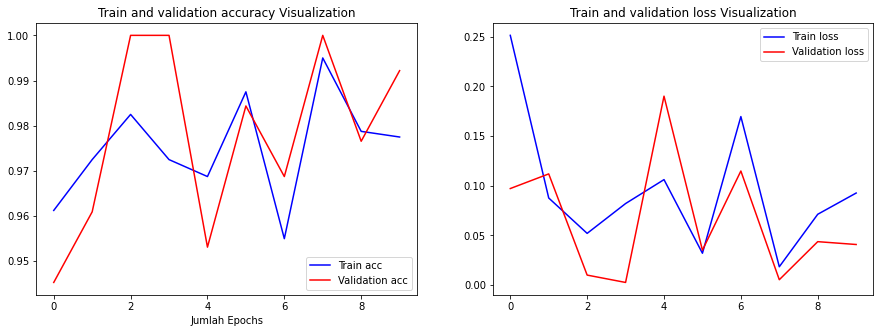

In [284]:
plot_history(history)

# Prediction

In [285]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

Saving gunting-ijo.jpg to gunting-ijo (3).jpg


Nama file kamu adalah: gunting-ijo.jpg
Kamu telah mengeluarkan gunting


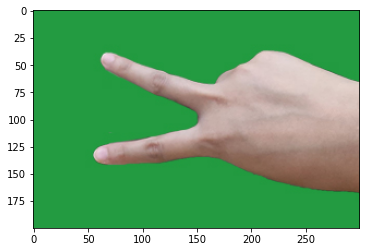

In [287]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


### Kesimpulan

Pada Submission ini menggunakan jenis optimizer dan loss function yang berbeda dari latihan sebelumnya, yaitu Optimizer RMSprop dengan loss='categorical_crossentropy

1. Model memiliki akurasi train sebesar ~98% dan akurasi validation sebesar ~99%.<br>
2. Penggunaan Optimizer RMSprop dengan loss='categorical_crossentropy menghasilkan nilai test dan training yang stabil dan bagus.
3. Menurut saya, ketika memprediksi gambar, model akan memberikan hasil prediksi yang baik ketika gambar yang di upload memiliki background green screen tetapi ketika image tidak memiliki background greenscreen hasil prediksi sering tidak sesuai. Hal ini dikarenakan dataset yang dipakai untuk training memiliki background yang seragam sehingga model hanya mengenali background green screen
4. Selain itu, posisi pengambilan gambar juga mungkin dapat mempengaruhi hasil prediksi, jika posisi gambar berbeda dari sample dataset (dikarenakan model belajar dari data yang ada) yang mengakibatkan model tersebut akan menghasilkan prediksi gambar yang salah. Namun, permasalahan tersebut masih dapat diatasi dengan menambahkan jumlah data dengan lengkap yang berisi bentuk dan ukuran gambar tangan dari berbagai posisi arah untuk meminimalisir kesalahan dalam menangani data test baru.
5. Asumsi yang didapat, sample gambar yang digunakan pada pengujian harus mirip dengan sample gambar pada proses pelatihan, dari segi posisi pengambilan gambar sampai bentuk gambar yang ada di gambar, agar model cakap dalam memprediksi gambar.